In [5]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [6]:
# Load the Boston housing dataset from sklearn
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print (boston_dataset.keys())
print (boston_dataset.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

In [7]:
# Create the Dataset
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


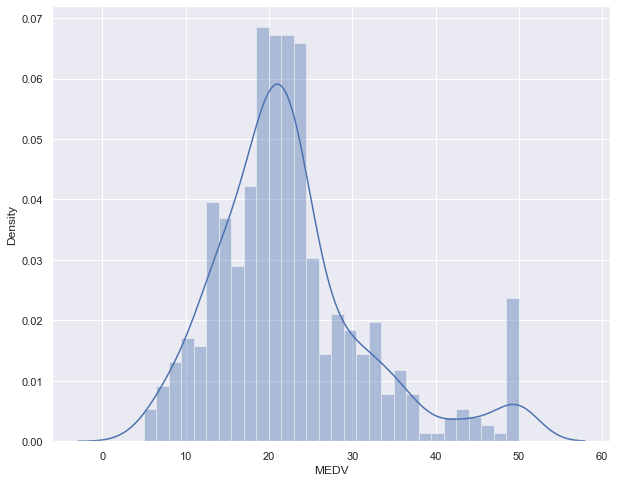

<AxesSubplot:>

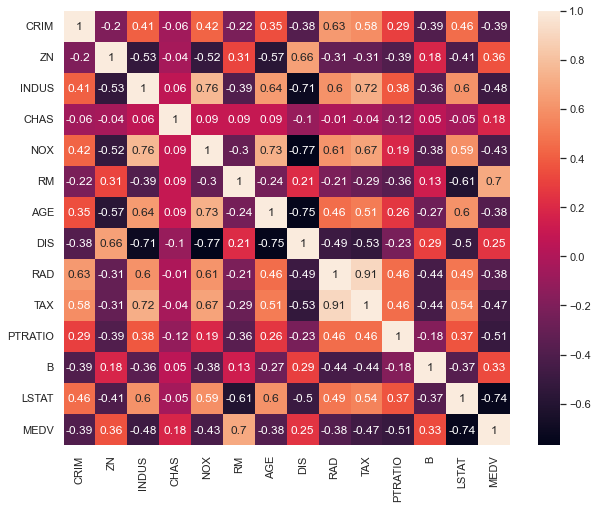

In [8]:
# Data Analysis- Make sure that there are No Missing values or NANs in the dataset
print(boston.isnull().sum())

# Plot the target Variable MEDV

sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(boston['MEDV'],bins=30)
plt.show()

correlation_matrix =boston.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

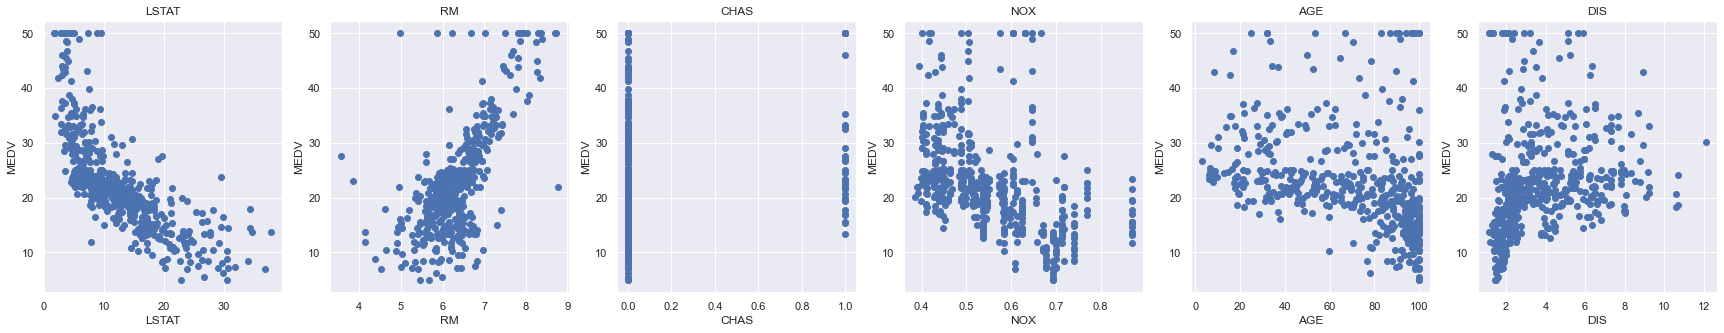

In [9]:
# Plot The features to check which is closer to Linear regression
plt.figure(figsize=(30,5))

features = ['LSTAT','RM','CHAS','NOX','AGE','DIS']
target = boston['MEDV']

for i , col in enumerate(features):
  plt.subplot(1,len(features),i+1)
  x = boston[col]
  y = target
  plt.scatter(x,y, marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

In [10]:
# Load and Split data from sklearn
from sklearn.model_selection import  train_test_split

X = boston.to_numpy()
X = np.delete(X, 13, 1)
y = boston['MEDV'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(len(y))

(404, 13)
(102, 13)
(404,)
(102,)
506


In [11]:
# Implementing Squared loss loss function MSE=1/n Σ(y-ŷ)^2
def SquaredLossFunction(feat_x, feat_y, weight, bias):
  squareLoss = np.sum(((feat_x.dot(weight) - feat_y)**2)/(len(feat_y)))
  return squareLoss

In [12]:
# Implementing gradient descent

def GradientDescent(feat_x, feat_y, weight, bias, learningrRate, iterations):
    iterationLoss=[]
    for iteration in range(iterations):
        y_predict = feat_x.dot(weight) + bias
        loss = y_predict - feat_y

        #Calculate Gradient for weight and Bias
        weight_gradient = (2 * (feat_x.T.dot(loss)))/ len(feat_y)
        bias_gradient = (2 * np.sum(loss)) / len(feat_y)

        weight = weight - (learningrRate * weight_gradient)
        bias   = bias - (learningrRate * bias_gradient)

        meanSquaredLoss = SquaredLossFunction(feat_x, feat_y, weight, bias)
        
        iterationLoss.append(meanSquaredLoss)
        

        if(iteration%(iterations/10)==0):
         # print(iteration)
          print("Loss is:", meanSquaredLoss)

    return weight, bias, iterationLoss

In [13]:
# Training Model

initial_weight = np.zeros(X_train.shape[1])
initial_bias = 0
learningRate =0.000002

w,b,cost = GradientDescent(X_train,y_train,initial_weight, initial_bias,learningRate,iterations=150000)

Loss is: 151.59613776585635
Loss is: 40.79557429534068
Loss is: 37.27697424308368
Loss is: 35.63307666113754
Loss is: 34.466756434416
Loss is: 33.489355268122
Loss is: 32.616213676429666
Loss is: 31.818148429337846
Loss is: 31.08278260746914
Loss is: 30.40321070525429


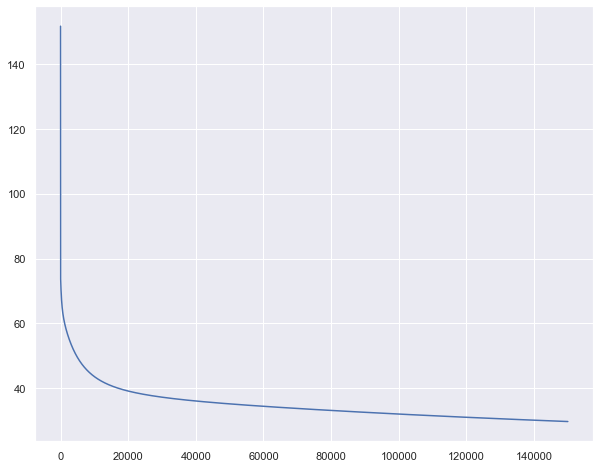

In [14]:
# The plot of the cost(error) should decrease as the iterations increase. 
# This would imply that the function is converging
plt.plot(cost) 

In [15]:
# Prediction function
def predict(X, weight , bias):
    return X.dot(w) + bias

# RootMeanSquaredLoss Function
def rmse(predicted_value, actual_value):
    return np.sqrt(((predicted_value - actual_value)** 2).mean() )



In [16]:
# Accuracy Calculation using R^2 score/ coefficient of determinition
# R^2 = 1- SSres/SStot
# SSres is the sum of squares of the residual errors.
# SStot is the total sum of the errors.
def rSquareScore(y_predicted, y_test):
    SS_res = np.sum((y_predicted - y_test) ** 2)
    y_mean = y_test.mean()
    SS_tot = np.sum((y - y_mean)**2)
    
    score = 1 - (SS_res/SS_tot)
    return score


In [17]:
# Model Evaluation
# Training Set Evaluation
y_pred_train = predict(X_train,w,b)
rSquareScore_train= rSquareScore(y_pred_train, y_train)
print ("Training R2 score = " + str(rSquareScore_train))

# Testing Set Evaluation
y_pred_test = predict(X_test,w,b)
rSquareScore_test = rSquareScore(y_pred_test, y_test)
print ("Testing R2 score = " + str(rSquareScore_test))

# The Model Gives an accuracy of 0.72 on training data and 0.86 on test data

Training R2 score = 0.7209814099074119
Testing R2 score = 0.8630036349446293


In [18]:
# Implementing using Sklearn to draw comparion between our implemented model and Sklearn Model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

# Model evaluation
from sklearn.metrics import r2_score

# Training Set Evaluation
y_pred_train_sk = lin_model.predict(X_train)
rSquareScore_train_sk= r2_score(y_train,y_pred_train_sk)
print ("Training R2 score using sklearn = " + str(rSquareScore_train_sk))

# Testing Set Evaluation
y_pred_test_sk = lin_model.predict(X_test)
rSquareScore_test_sk= r2_score(y_test,y_pred_test_sk)
print ("Testing R2 score using sklearn = " + str(rSquareScore_test_sk))

# The SK Learning Model Gives an accuracy of 0.75 on training data and 0.67 on test data

Training R2 score using sklearn = 0.750121534530608
Testing R2 score using sklearn = 0.6709339839115633


In [19]:
# The Model implemented from scratch gives a better accuracy of predicted values(86%) than the sklearning Model(67%).